In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Reading and preprocessing data

In [8]:
dataset = pd.read_csv('Binary Dataset of Phishing and Legitimate URLs.csv', error_bad_lines=False)
dataset.columns = ['whois_regDate', 'whois_expDate', 'whois_updatedDate', 'dot_count', 'url_len', 'digit_count', 'special_count', 'hyphen_count', 'double_slash', 'single_slash', 'at_the_rate', 'protocol', 'protocol_count', 'web_traffic', 'label']
dataset.head()

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,web_traffic,label
0,8451,2870,422,1,10,0,0,0,0,0,0,0,0,0,1
1,5741,102,295,1,11,0,0,0,0,0,0,0,0,0,1
2,8419,345,720,1,9,0,0,0,0,0,0,0,0,0,1
3,7695,2166,545,1,9,0,0,0,0,0,0,0,0,0,1
4,9316,2455,6,1,6,0,0,0,0,0,0,0,0,0,1


In [9]:
#checking shapes of the datasets
print (dataset.shape)

(11000, 15)


In [10]:
dataset.dtypes

whois_regDate        int64
whois_expDate        int64
whois_updatedDate    int64
dot_count            int64
url_len              int64
digit_count          int64
special_count        int64
hyphen_count         int64
double_slash         int64
single_slash         int64
at_the_rate          int64
protocol             int64
protocol_count       int64
web_traffic          int64
label                int64
dtype: object

In [11]:
for i in range (0, len(dataset.columns)):
  print(dataset.columns[i] + ":")
  print (sorted(dataset[dataset.columns[i]].unique()))  

whois_regDate:
[-1, 4, 61, 72, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128, 129, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 154, 157, 158, 159, 160, 161, 163, 164, 165, 167, 169, 170, 171, 172, 174, 175, 176, 177, 179, 180, 181, 183, 184, 187, 188, 189, 190, 191, 192, 193, 194, 197, 199, 200, 201, 203, 204, 206, 209, 210, 211, 214, 216, 217, 219, 221, 222, 224, 225, 227, 229, 231, 232, 233, 236, 237, 239, 240, 243, 244, 246, 248, 250, 251, 252, 254, 255, 259, 261, 262, 265, 268, 272, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 288, 289, 296, 300, 301, 309, 310, 312, 315, 316, 319, 321, 322, 323, 326, 329, 331, 335, 337, 338, 340, 341, 342, 343, 344, 346, 348, 349, 350, 351, 353, 354, 356, 357, 359, 360, 362, 363, 364, 365, 366, 368, 369, 371, 373, 374, 375, 376, 377, 379, 380, 384

In [12]:
print (dataset)

       whois_regDate  whois_expDate  whois_updatedDate  dot_count  url_len  \
0               8451           2870                422          1       10   
1               5741            102                295          1       11   
2               8419            345                720          1        9   
3               7695           2166                545          1        9   
4               9316           2455                  6          1        6   
...              ...            ...                ...        ...      ...   
10995             -1             -1                 -1          4       77   
10996            282             83                 99          2       40   
10997            222            142                222          2       40   
10998            144            220                139          3      177   
10999           2412            144                223          1       25   

       digit_count  special_count  hyphen_count  double_slash  

In [13]:
target = dataset['label']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [14]:
features = dataset[['whois_regDate', 'whois_expDate', 'whois_updatedDate', 'dot_count', 'url_len', 'digit_count', 'special_count', 'hyphen_count', 'double_slash', 'single_slash', 'at_the_rate', 'protocol', 'protocol_count', 'web_traffic']]
features.head()

,whois_regDate,whois_expDate,whois_updatedDate,dot_count,url_len,digit_count,special_count,hyphen_count,double_slash,single_slash,at_the_rate,protocol,protocol_count,web_traffic
0,8451,2870,422,1,10,0,0,0,0,0,0,0,0,0
1,5741,102,295,1,11,0,0,0,0,0,0,0,0,0
2,8419,345,720,1,9,0,0,0,0,0,0,0,0,0
3,7695,2166,545,1,9,0,0,0,0,0,0,0,0,0
4,9316,2455,6,1,6,0,0,0,0,0,0,0,0,0


In [15]:
print (features.shape)
print (target.shape)

(11000, 14)
(11000,)


In [16]:
features_train, features_test, target_train, target_test= train_test_split(features, target, test_size= 0.2, random_state=0) 

In [17]:
print (features_train.shape)
print (features_test.shape)
print (target_train.shape)
print (target_test.shape)

(8800, 14)
(2200, 14)
(8800,)
(2200,)


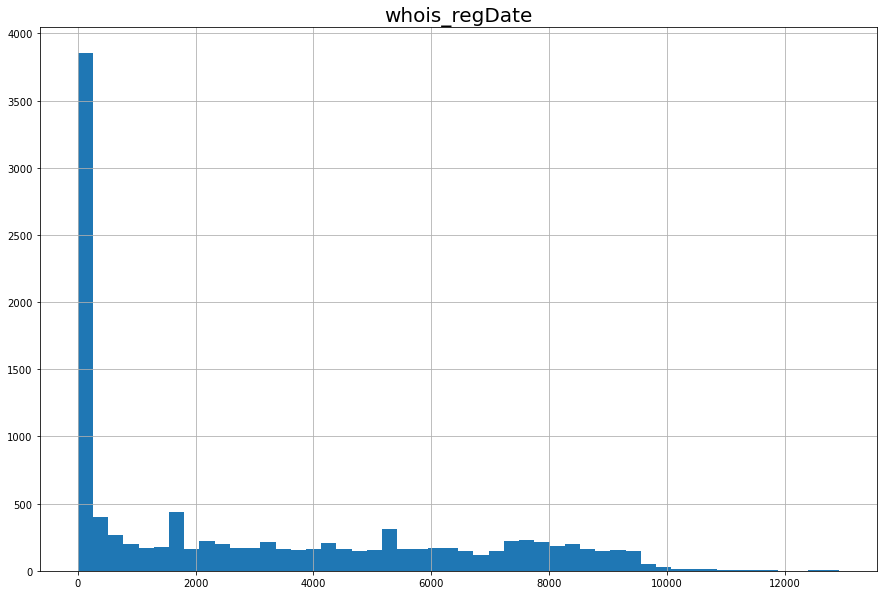

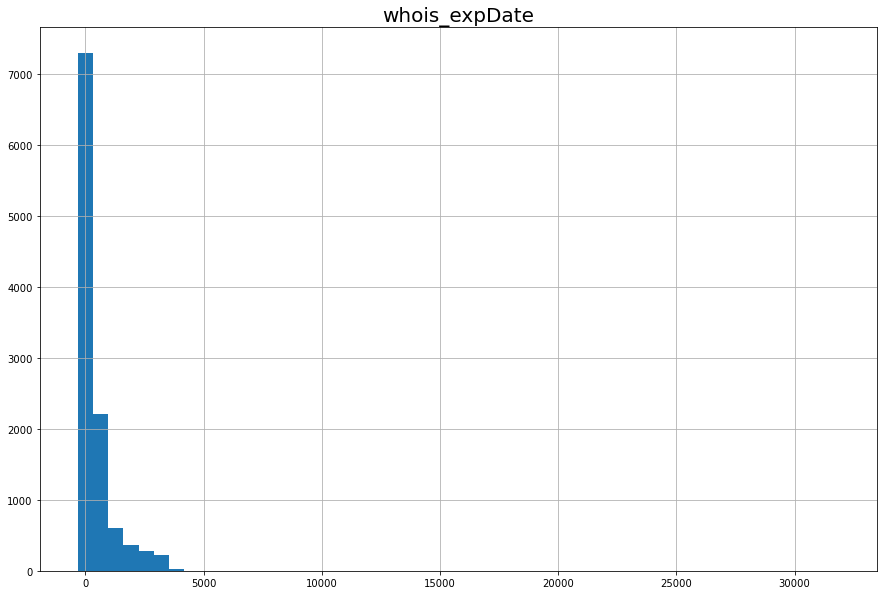

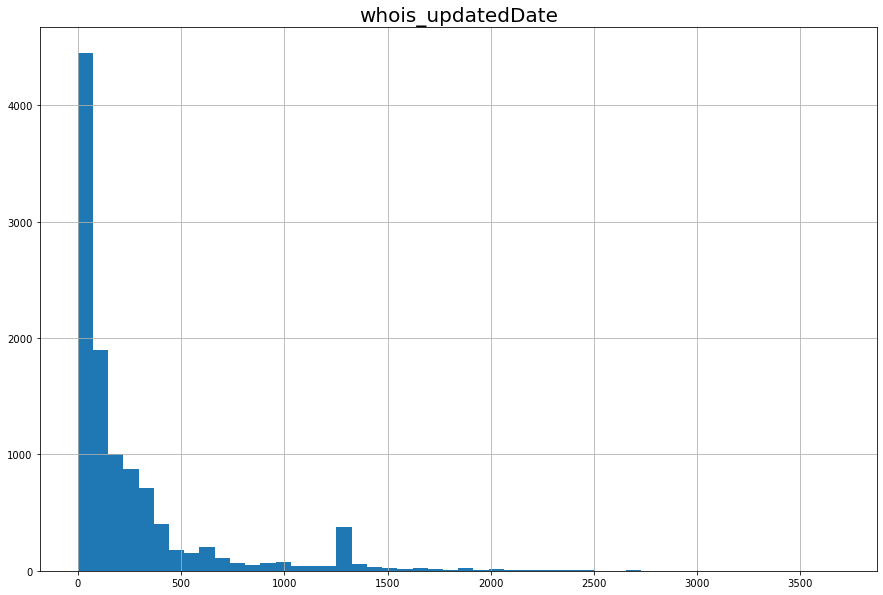

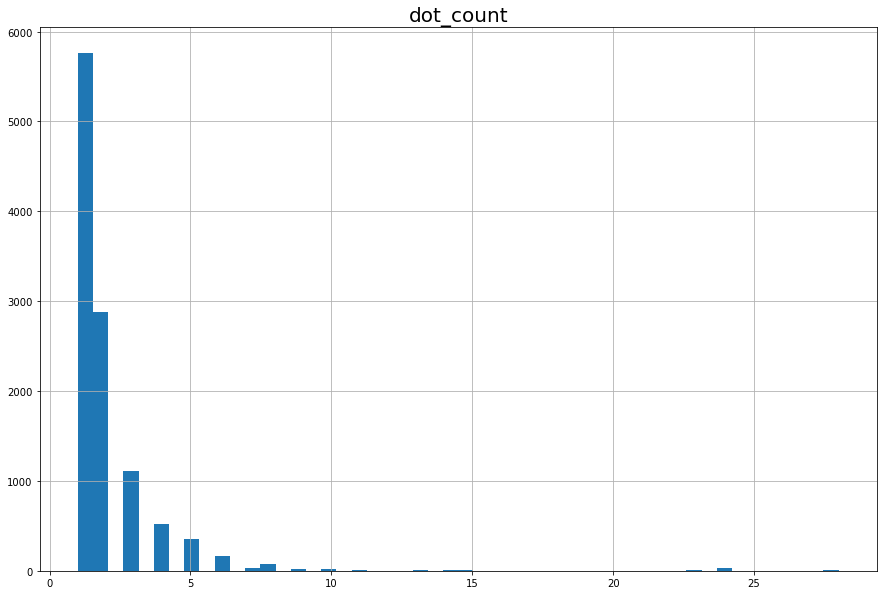

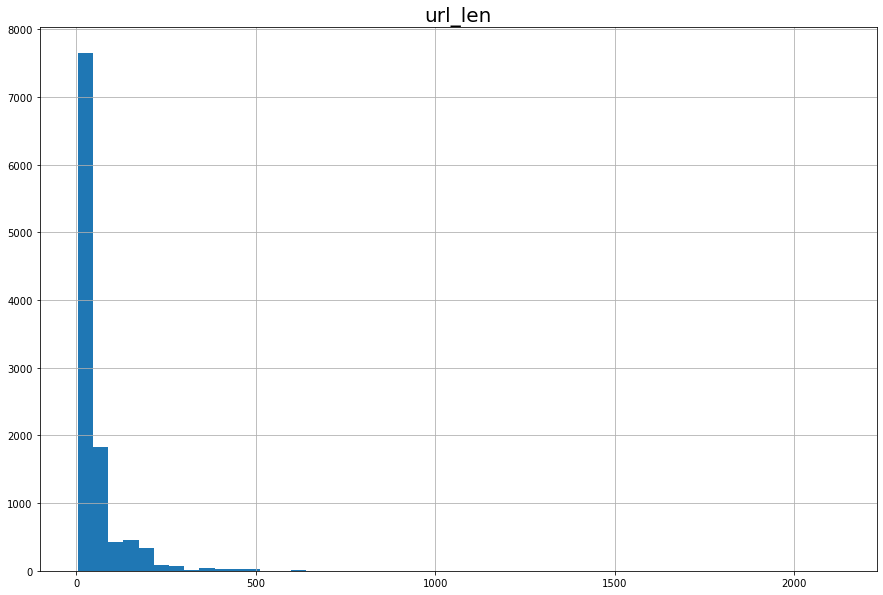

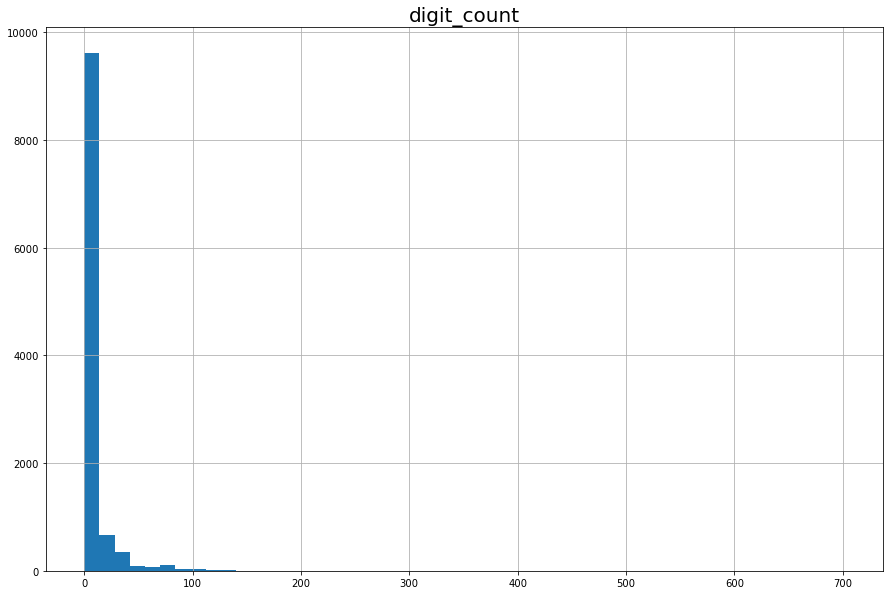

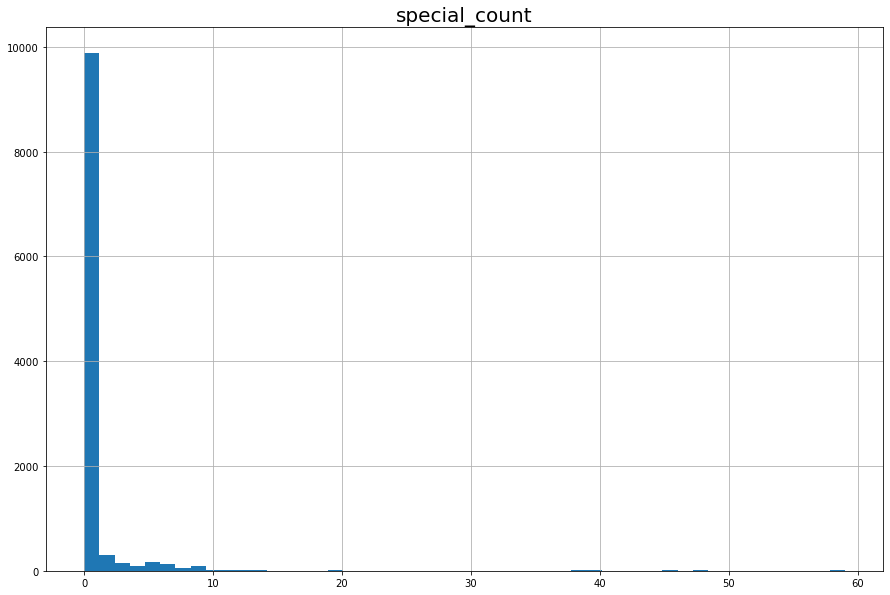

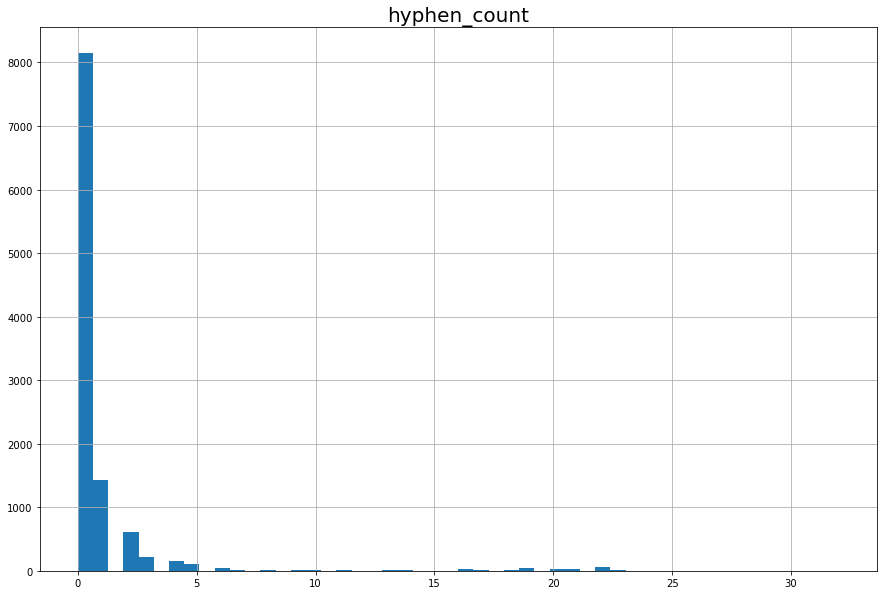

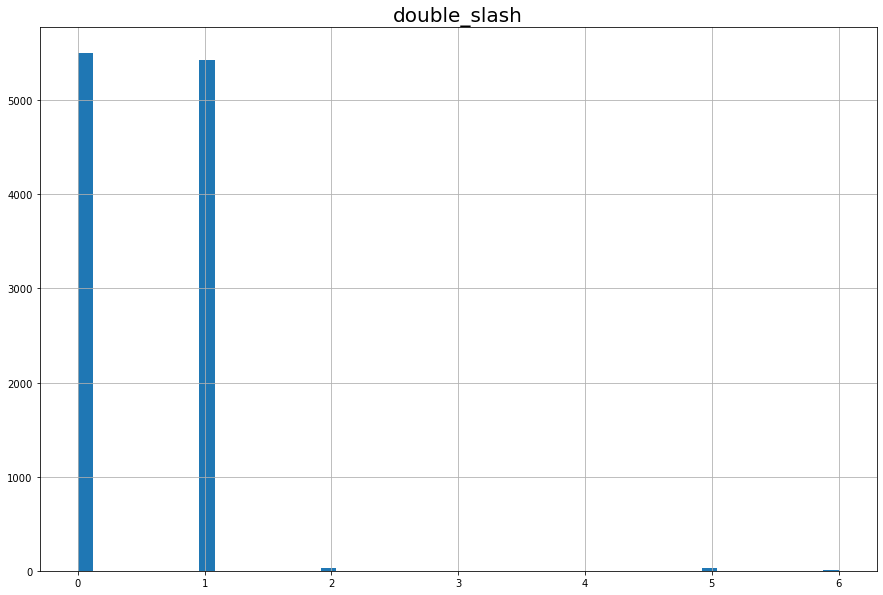

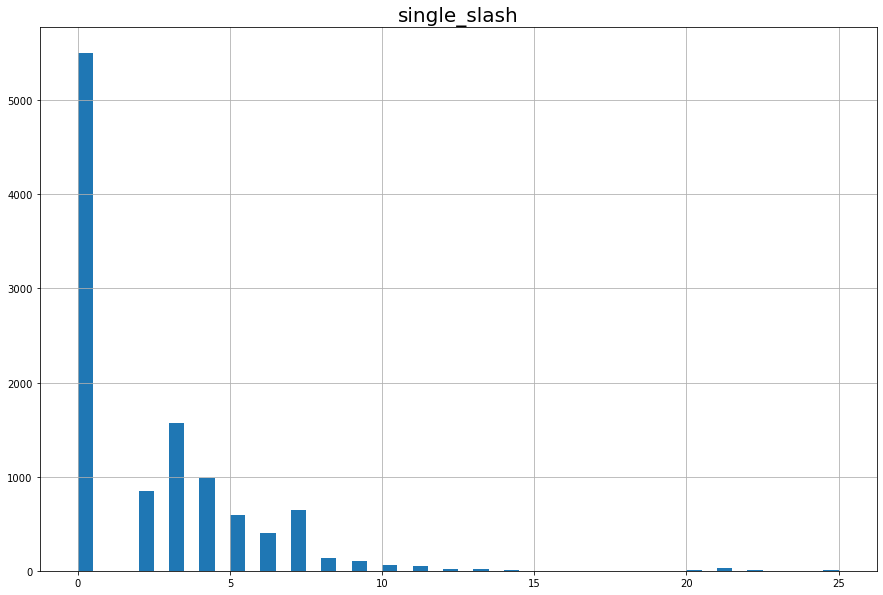

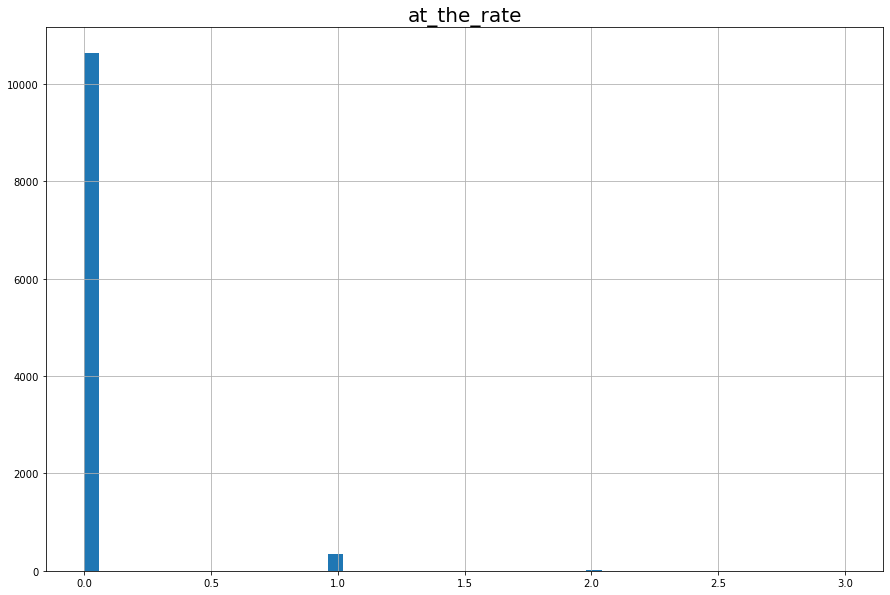

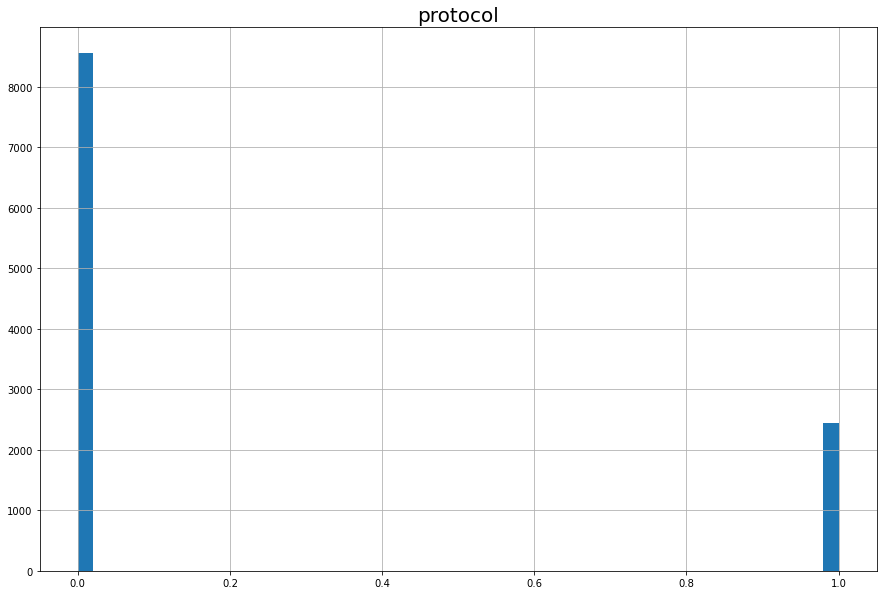

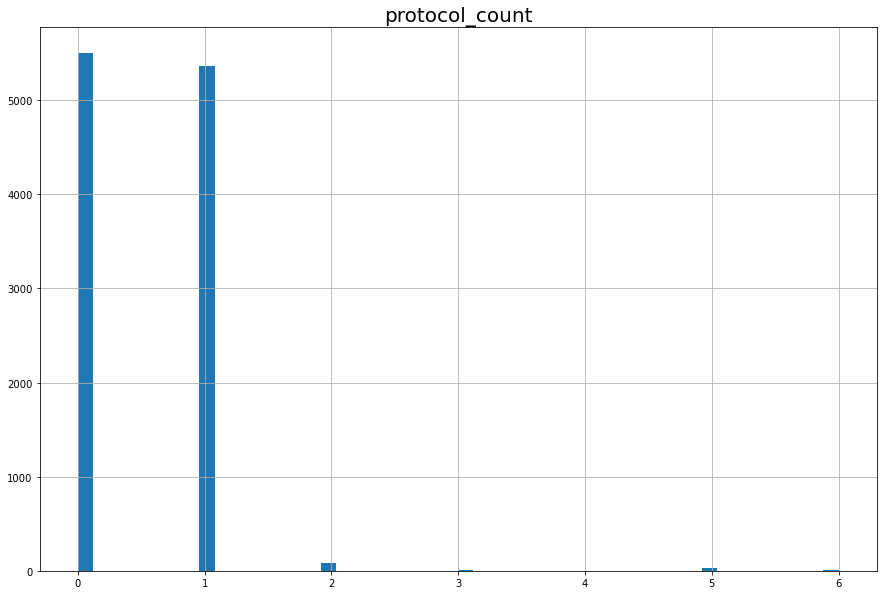

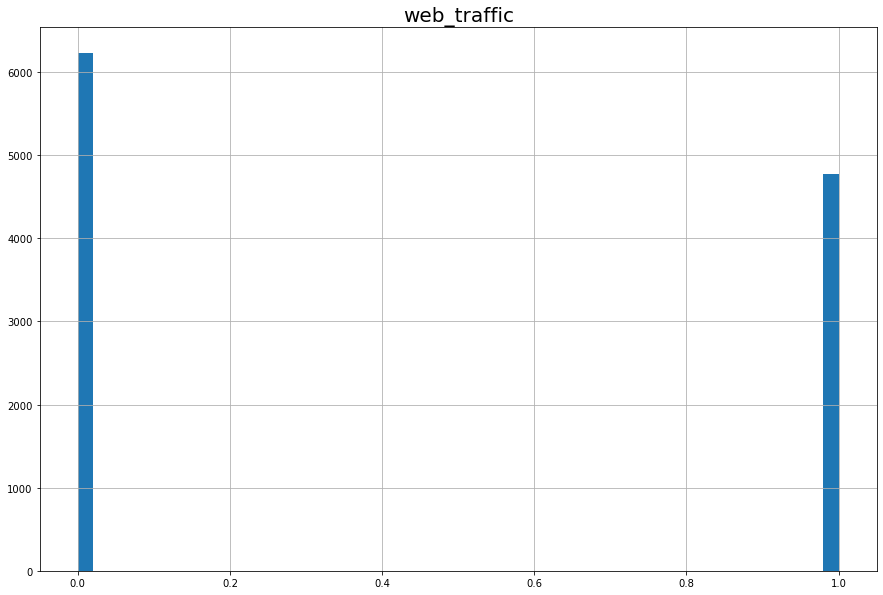

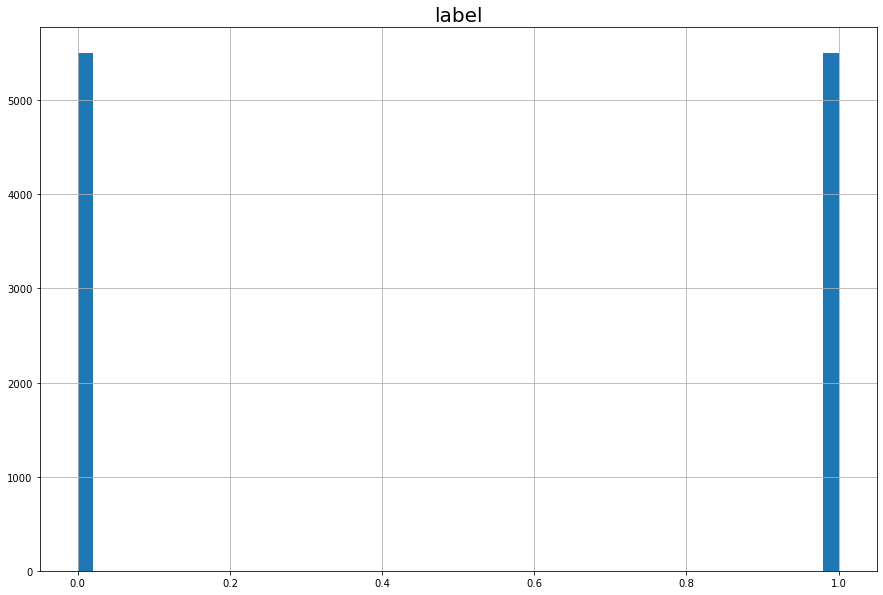

In [18]:
for i in range(0, dataset.shape[1]):
  dataset[dataset.columns[i]].hist(bins = 50, figsize = (15,10))
  plt.title(dataset.columns[i], size=20)
  plt.show()

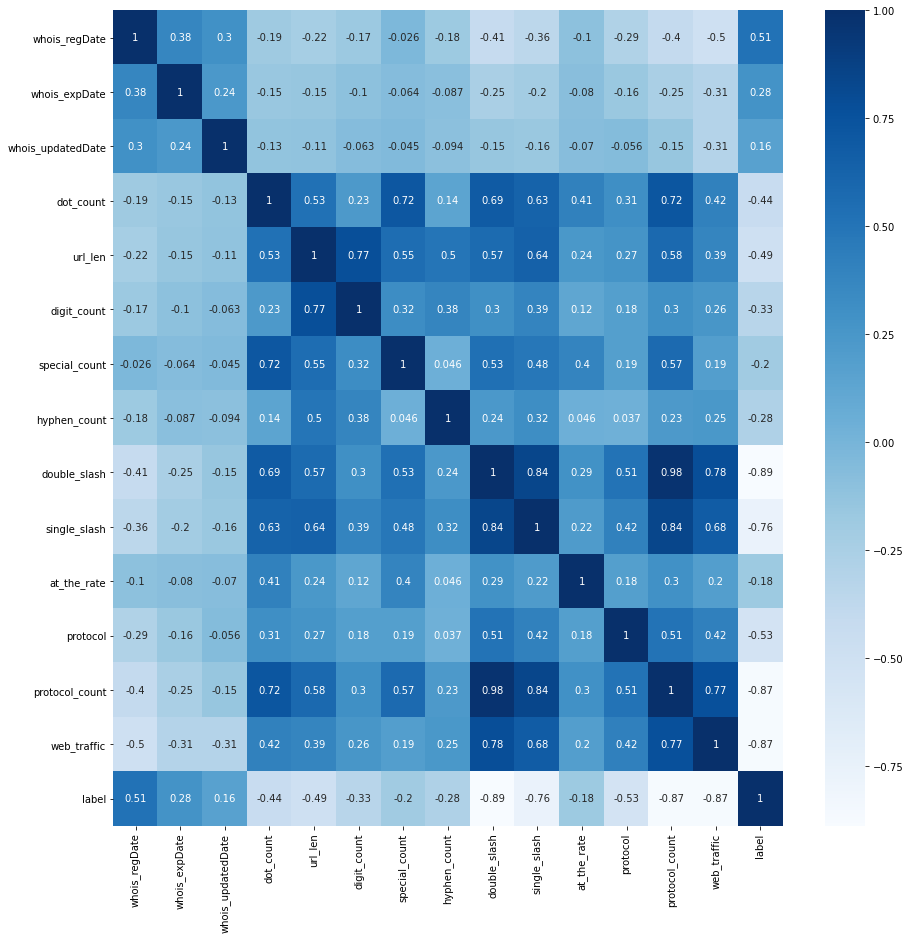

In [19]:
# Finding parameter correlations
fig, ax = plt.subplots(figsize=(15, 15))
corr = dataset.corr()
ax = sns.heatmap(corr, annot = True, cmap='Blues')

In [20]:
# create scaler
scaler = StandardScaler()

In [21]:
# transform the attributes
features_standardized = scaler.fit_transform(features)
features_train_standardized = scaler.fit_transform(features_train)
features_test_standardized = scaler.fit_transform(features_test)

In [22]:
# print mean and standard deviation
print ("Mean: ", round(features_standardized[:,0].mean()))
print("Standard deviation: ", features_standardized[:,0].std())

Mean:  0
Standard deviation:  1.0


# Finding the best parameters for the neural network

In [17]:
# function for creating compiled neural network
def create_network(optimizer='rmsprop'):
  # define the keras model
  network = Sequential()
  network.add(Dense(14, input_dim=14, activation='relu'))
  network.add(Dense(8, activation='relu'))
  network.add(Dense(1, activation='sigmoid'))

  # compile the keras model
  network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return network

In [18]:
neural_network=KerasClassifier(build_fn=create_network, verbose=0)

In [19]:
epochs = [5,10, 150]
batches = [5, 10, 100, 150]
optimizers = ["rmsprop", "adam"]

In [20]:
#Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [21]:
# create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

In [24]:
# fit grid search
grid_result = grid.fit(features_standardized, target)

In [25]:
#View hyperparameters of best neural network
grid_result.best_params_

{'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}

# Creating the best network

In [23]:
def create_the_best_network(optimizer='rmsprop'):
  # define the keras model
  best_network = Sequential()
  best_network.add(Dense(14, input_dim=14, activation='relu'))
  best_network.add(Dense(8, activation='relu'))
  best_network.add(Dense(1, activation='sigmoid'))

  # compile the keras model
  best_network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return best_network

In [24]:
best_neural_network = create_the_best_network()

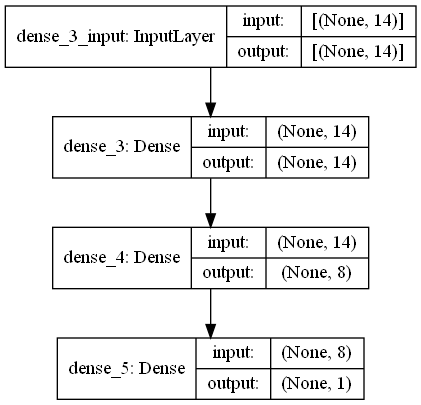

In [25]:
# Visualize network architecture
plot_model(best_neural_network, show_shapes=True, show_layer_names=True)
#SVG(model_to_dot(best_neural_network, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True).create(prog="dot", format="svg"))

In [26]:
history = best_neural_network.fit(features_train_standardized, target_train, epochs=10, batch_size=5, verbose=1, validation_data=(features_test_standardized, target_test))

Epoch 1/10
1760/1760 [==============================] - 3s 1ms/step - loss: 0.1301 - accuracy: 0.9909 - val_loss: 2.2494e-07 - val_accuracy: 1.0000
Epoch 2/10
1760/1760 [==============================] - 2s 1ms/step - loss: 4.8023e-08 - accuracy: 1.0000 - val_loss: 1.9160e-08 - val_accuracy: 1.0000
Epoch 3/10
1760/1760 [==============================] - 2s 1ms/step - loss: 1.5518e-09 - accuracy: 1.0000 - val_loss: 5.9577e-09 - val_accuracy: 1.0000
Epoch 4/10
1760/1760 [==============================] - 2s 1ms/step - loss: 4.1028e-10 - accuracy: 1.0000 - val_loss: 5.3872e-09 - val_accuracy: 1.0000
Epoch 5/10
1760/1760 [==============================] - 2s 1ms/step - loss: 3.0204e-10 - accuracy: 1.0000 - val_loss: 5.8031e-09 - val_accuracy: 1.0000
Epoch 6/10
1760/1760 [==============================] - 2s 1ms/step - loss: 2.6073e-10 - accuracy: 1.0000 - val_loss: 6.1965e-09 - val_accuracy: 1.0000
Epoch 7/10
1760/1760 [==============================] - 2s 1ms/step - loss: 2.0572e-10 - acc

In [29]:
#Prediction
predicted_target = best_neural_network.predict_classes(features_test_standardized)

target_test_array = np.array(target_test)
for i in range (0, len(predicted_target)):
  print ("Real value: " + str(target_test_array[i]) + " Predicted value: " + str(predicted_target[i]))

Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

In [30]:
# get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [31]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

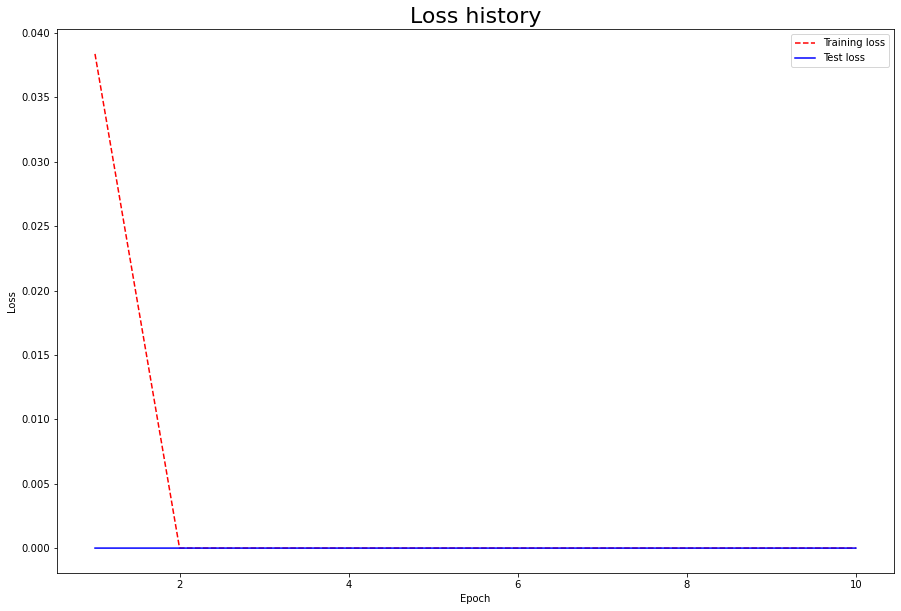

In [32]:
# Visualize loss history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss history", size=22)
plt.show()

In [33]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

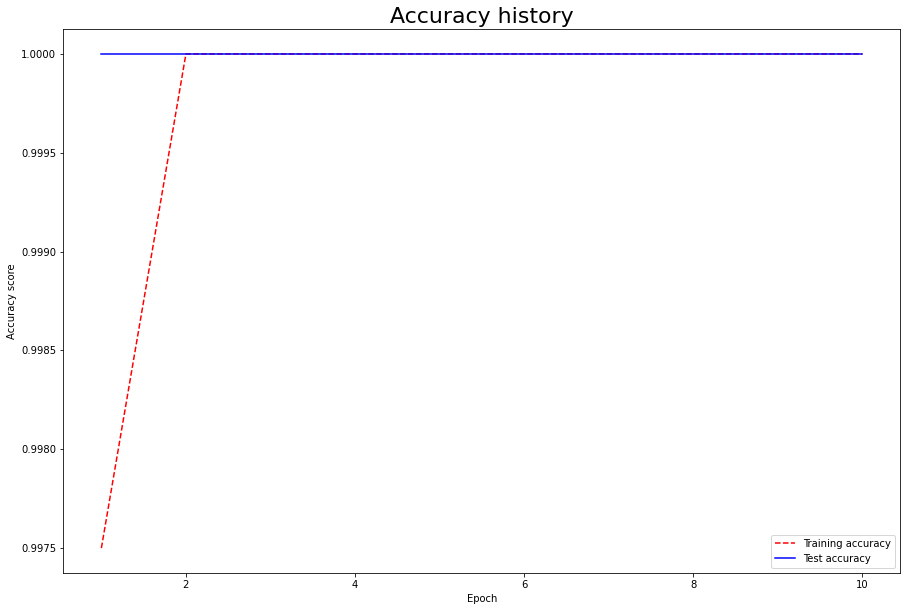

In [34]:
# Visualize accuracy history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.title("Accuracy history", size=22)
plt.show()

In [35]:
# evaluate the keras model
best_network_train_loss, best_network_train_accuracy = best_neural_network.evaluate(features_train_standardized, target_train)
print ('Training accuracy: %.2f' % (best_network_train_accuracy*100))
print ('Training loss: ', best_network_train_loss)

best_network_test_loss, best_network_test_accuracy = best_neural_network.evaluate(features_test_standardized, target_test)
print ('Test accuracy: %.2f' % (best_network_test_accuracy*100))
print ('Test loss: ', best_network_test_loss)

275/275 [==============================] - 1s 2ms/step - loss: 1.2973e-10 - accuracy: 1.0000
Training accuracy: 100.00
Training loss:  1.2973440377539447e-10
69/69 [==============================] - 0s 2ms/step - loss: 1.0314e-08 - accuracy: 1.0000
Test accuracy: 100.00
Test loss:  1.0313847553788946e-08


# Reducing overfitting with weight regularization

In [36]:
def create_network_with_weight_regularization(optimizer='rmsprop'):
  # define the keras model
  network_with_weight_regularization = Sequential()
  network_with_weight_regularization.add(Dense(14, input_dim=14, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  network_with_weight_regularization.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  network_with_weight_regularization.add(Dense(1, activation='sigmoid'))

  # compile the keras model
  network_with_weight_regularization.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return network_with_weight_regularization

In [37]:
network_with_weight_regularization = create_network_with_weight_regularization()

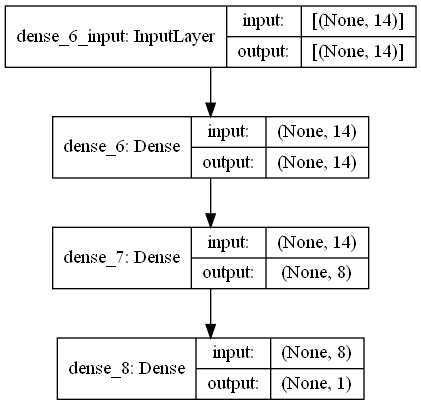

In [38]:
# Visualize network architecture
plot_model(network_with_weight_regularization, show_shapes=True, show_layer_names=True)

In [39]:
history = network_with_weight_regularization.fit(features_train_standardized, target_train, epochs=10, batch_size=5, verbose=1, validation_data=(features_test_standardized, target_test))

Epoch 1/10
1760/1760 [==============================] - 3s 1ms/step - loss: 0.3082 - accuracy: 0.9534 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 2/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 3/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 4/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 5/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 6/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 7/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy:

In [40]:
#Prediction
predicted_target = network_with_weight_regularization.predict_classes(features_test_standardized)

target_test_array = np.array(target_test)
for i in range (0, len(predicted_target)):
  print ("Real value: " + str(target_test_array[i]) + " Predicted value: " + str(predicted_target[i]))

Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predic

Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predic

In [41]:
# get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

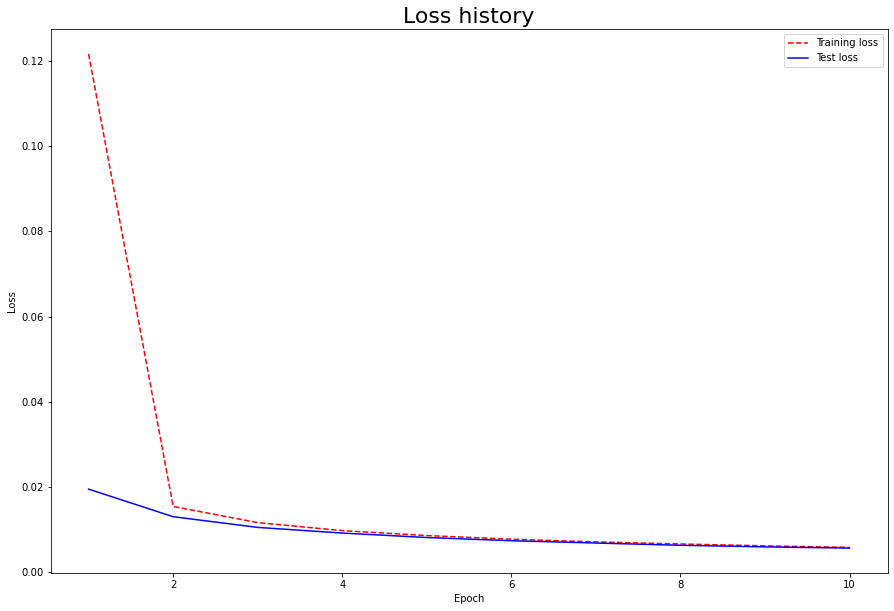

In [42]:
# Visualize loss history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss history", size=22)
plt.show()

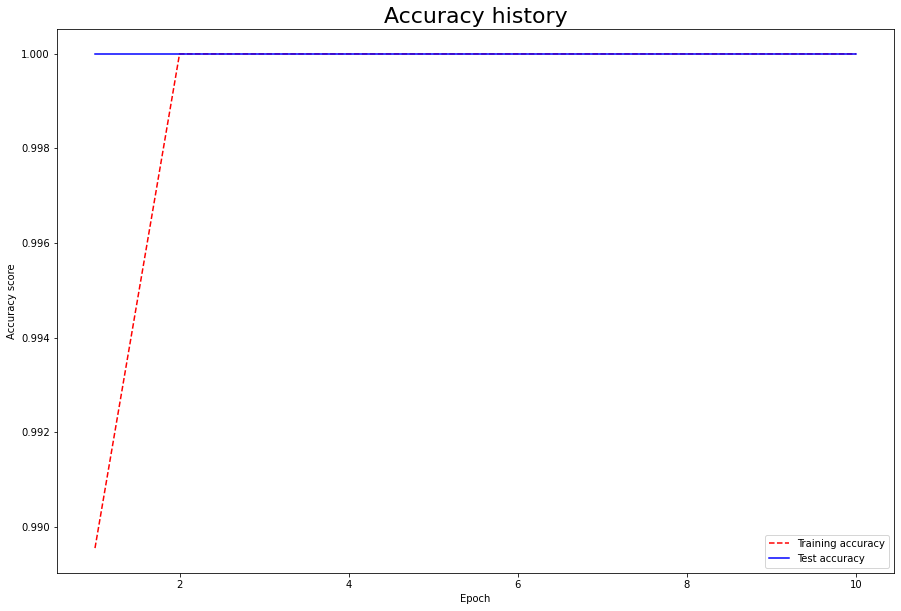

In [43]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
# Visualize accuracy history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.title("Accuracy history", size=22)
plt.show()

In [44]:
# evaluate the keras model
weight_regularization_train_loss, weight_regularization_train_accuracy = network_with_weight_regularization.evaluate(features_train_standardized, target_train)
print ('Training accuracy: %.2f' % (weight_regularization_train_accuracy*100))
print ('Training loss: ', weight_regularization_train_loss)

weight_regularization_test_loss, weight_regularization_test_accuracy = network_with_weight_regularization.evaluate(features_test_standardized, target_test)
print ('Test accuracy: %.2f' % (weight_regularization_test_accuracy*100))
print ('Test loss: ', weight_regularization_test_loss)

275/275 [==============================] - 1s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Training accuracy: 100.00
Training loss:  0.0055900574661791325
69/69 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Test accuracy: 100.00
Test loss:  0.0056452336721122265


# Reducing overfitting with dropout

In [45]:
def create_network_with_dropout(optimizer='rmsprop'):
  # define the keras model
  network_with_dropuot = Sequential()
  network_with_dropuot.add(Dropout(0.2, input_dim=14))
  network_with_dropuot.add(Dense(14, activation='relu'))
  network_with_dropuot.add(Dropout(0.5))
  network_with_dropuot.add(Dense(8, activation='relu'))
  network_with_dropuot.add(Dense(1, activation='sigmoid'))

  # compile the keras model
  network_with_dropuot.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return network_with_dropuot

In [46]:
network_with_dropuot = create_network_with_dropout()

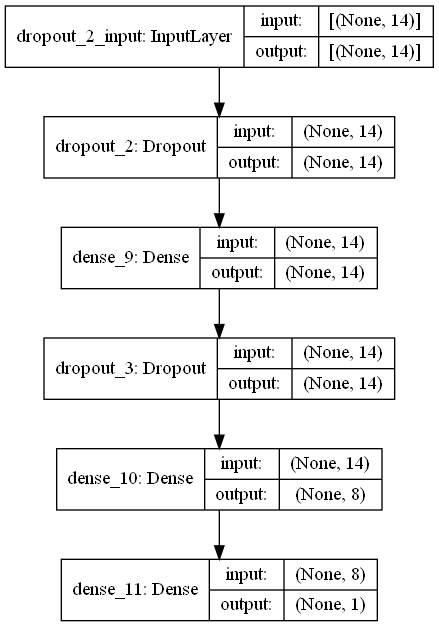

In [47]:
# Visualize network architecture
plot_model(network_with_dropuot, show_shapes=True, show_layer_names=True)

In [48]:
history = network_with_dropuot.fit(features_train_standardized, target_train, epochs=10, batch_size=5, verbose=1, validation_data=(features_test_standardized, target_test))

Epoch 1/10
1760/1760 [==============================] - 3s 1ms/step - loss: 0.2578 - accuracy: 0.8804 - val_loss: 2.1056e-04 - val_accuracy: 1.0000
Epoch 2/10
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9901 - val_loss: 5.4410e-07 - val_accuracy: 1.0000
Epoch 3/10
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 1.3588e-09 - val_accuracy: 1.0000
Epoch 4/10
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 1.1987e-12 - val_accuracy: 1.0000
Epoch 5/10
1760/1760 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9958 - val_loss: 2.6941e-14 - val_accuracy: 1.0000
Epoch 6/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 9.9581e-16 - val_accuracy: 1.0000
Epoch 7/10
1760/1760 [==============================] - 2s 1ms/step - loss: 0.0198 - accuracy: 0.9958 - val_loss

In [49]:
#Prediction
predicted_target = network_with_dropuot.predict_classes(features_test_standardized)

target_test_array = np.array(target_test)
for i in range (0, len(predicted_target)):
  print ("Real value: " + str(target_test_array[i]) + " Predicted value: " + str(predicted_target[i]))

Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predic

Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 0 Predicted value: [0]
Real value: 1 Predicted value: [1]
Real value: 0 Predicted value: [0]
Real value: 1 Predic

In [50]:
# get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

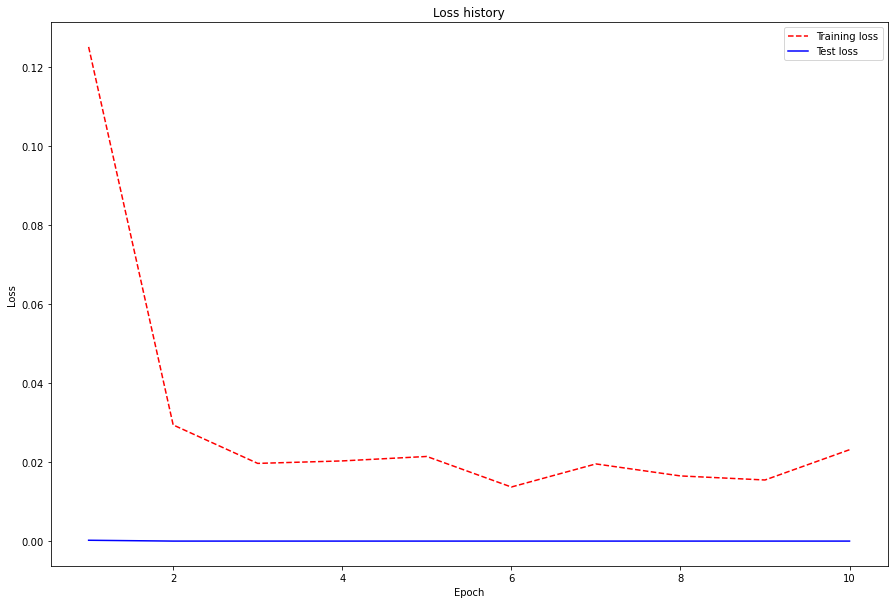

In [51]:
# Visualize loss history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss history")
plt.show()

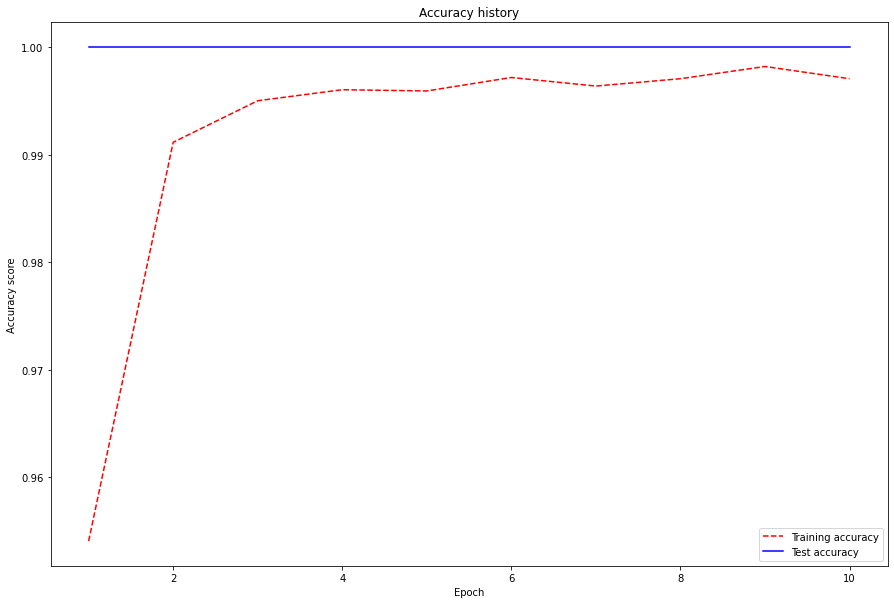

In [52]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
# Visualize accuracy history
plt.figure(figsize=(15, 10))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.title("Accuracy history")
plt.show()

In [53]:
# evaluate the keras model
dropout_train_loss, dropout_train_accuracy = network_with_dropuot.evaluate(features_train_standardized, target_train)
print ('Training accuracy: %.2f' % (dropout_train_accuracy*100))
print ('Training loss: ', dropout_train_loss)

dropout_test_loss, dropout_test_accuracy = network_with_dropuot.evaluate(features_test_standardized, target_test)
print ('Test accuracy: %.2f' % (dropout_test_accuracy*100))
print ('Test loss: ', dropout_test_loss)

275/275 [==============================] - 1s 2ms/step - loss: 3.9516e-18 - accuracy: 1.0000
Training accuracy: 100.00
Training loss:  3.9516022592046485e-18
69/69 [==============================] - 0s 2ms/step - loss: 1.0342e-17 - accuracy: 1.0000
Test accuracy: 100.00
Test loss:  1.0342342596327074e-17
